In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Attention_EEG_data.csv')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [407]:
df[df['SubjectID']==0]['VideoID'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

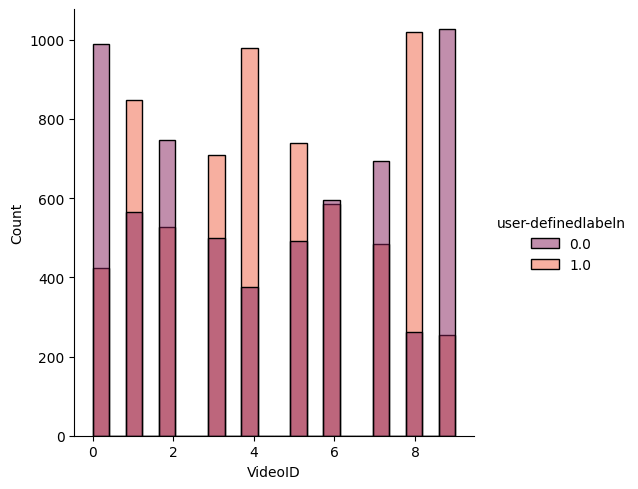

In [408]:
sns.displot(data=df, x='VideoID', hue='user-definedlabeln', palette='rocket')

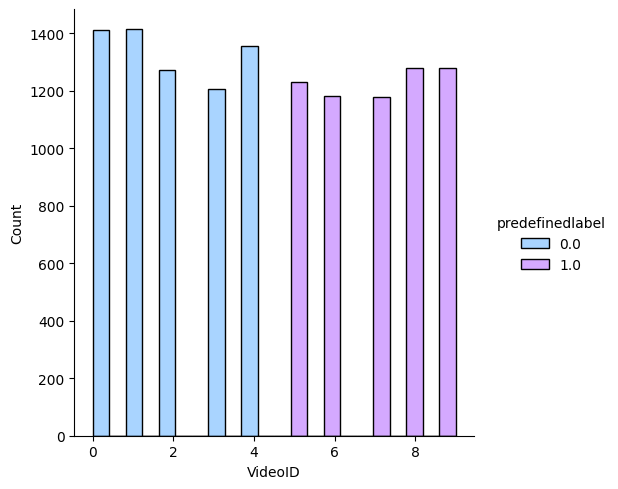

In [409]:
sns.displot(data=df, x='VideoID', hue='predefinedlabel', palette='cool')

<Axes: >

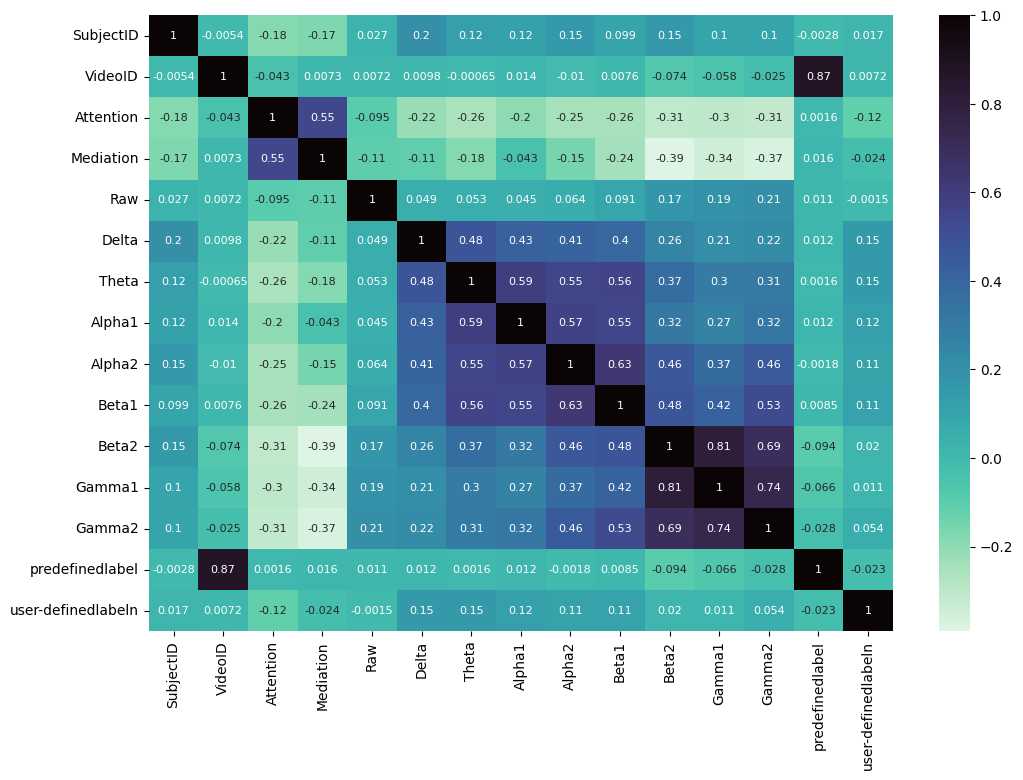

In [410]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='mako_r', annot_kws = {'size': 8})

In [411]:
# singleStuent = df[df['SubjectID'] == 7]
singleStuent = df

In [412]:
drop_cols = ['Raw', 'Mediation', 'Attention']

singleStuent = singleStuent.drop(drop_cols, axis=1)

In [413]:
singleStuent

,SubjectID,VideoID,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [414]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Output function
def print_metrics(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred):.2f}")
    # return  sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


In [415]:
X = singleStuent.drop('user-definedlabeln', axis=1)
y = singleStuent['user-definedlabeln']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= .7, random_state=42)

## Statistical Significance

VideoID            1.295292e+00
predefinedlabel    3.470350e+00
SubjectID          6.746491e+00
Gamma1             3.532307e+05
Beta2              8.028865e+05
Gamma2             3.306761e+06
Beta1              9.643253e+06
Alpha2             1.509645e+07
Alpha1             2.405591e+07
Theta              9.892066e+07
Delta              1.898140e+08
dtype: float64


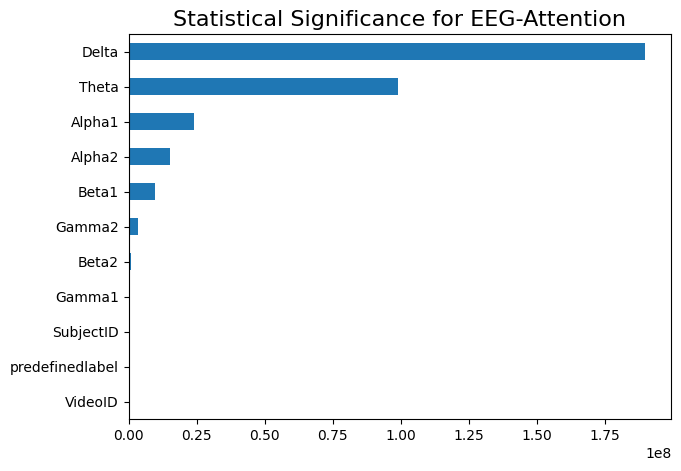

In [416]:
from sklearn.feature_selection import chi2
chi_val, p_val = chi2(X,y)

p_index = []
p_val_threshold = []
alpha = 0.05    # threshold for null hypothesis -> 5%

for j,k in enumerate(chi_val):
    p_val_threshold.append(k)
    p_index.append(X.columns[j])

p_val_series =  pd.Series(data=p_val_threshold, index=p_index).sort_values()
print(p_val_series)

plt.figure(figsize=(7,5))
ax = p_val_series.plot.barh()
plt.title(f"Statistical Significance for EEG-Attention", fontsize=16)
plt.show()

## Classification

In [417]:
classifiers = [
    XGBClassifier(max_depth=10),
    LogisticRegression(max_iter=1500),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=7),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier()
]

for clf in classifiers:
    print(clf)
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print_metrics(y_test, y_pred)
    
    print("___________________________________________________")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1902
         1.0       1.00      1.00      1.00      1942

    accuracy                           1.00      3844
   macro avg       1.00   

c:\Users\niloy\miniconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66      1902
         1.0       0.67      0.71      0.69      1942

    accuracy                           0.68      3844
   macro avg       0.68      0.68      0.68      3844
weighted avg       0.68      0.68      0.68      3844

ROC_AUC Score: 0.68
___________________________________________________
RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      1902
         1.0       0.90      0.97      0.93      1942

    accuracy                           0.93      3844
   macro avg       0.93      0.93      0.93      3844
weighted avg       0.93      0.93      0.93      3844

ROC_AUC Score: 0.93
___________________________________________________


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


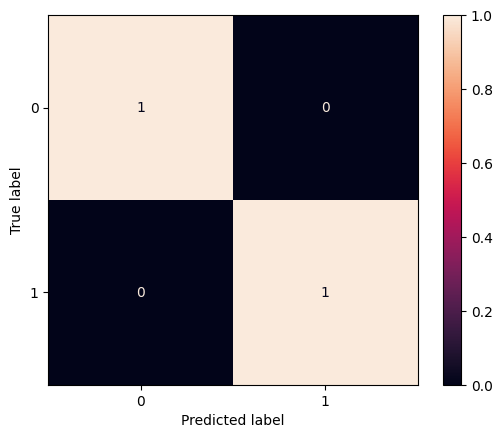

_____________________________________________
LogisticRegression(max_iter=1500)


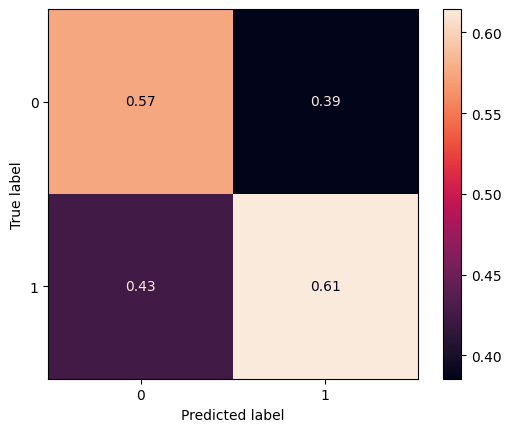

_____________________________________________
SVC()


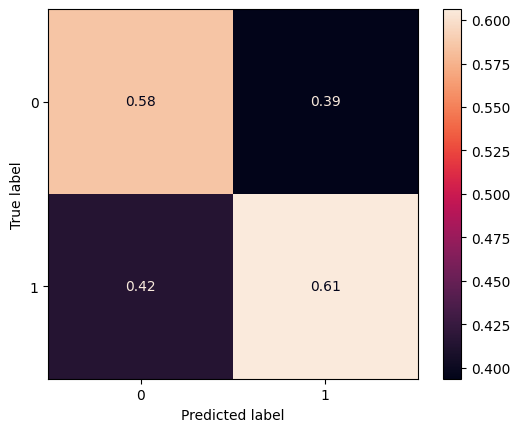

_____________________________________________
KNeighborsClassifier()


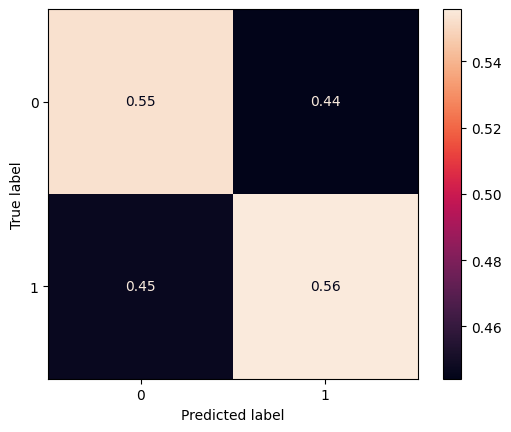

_____________________________________________
DecisionTreeClassifier(max_depth=7)


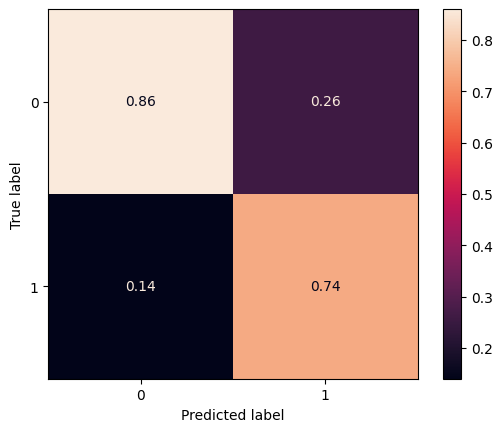

_____________________________________________
GradientBoostingClassifier()


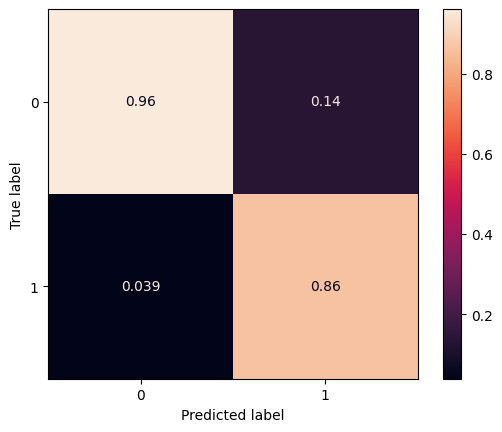

_____________________________________________


c:\Users\niloy\miniconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()


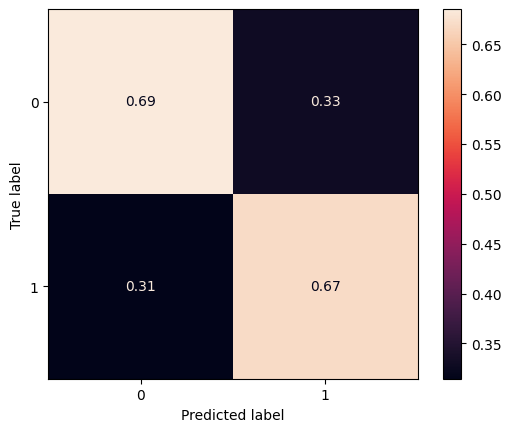

_____________________________________________
RandomForestClassifier()


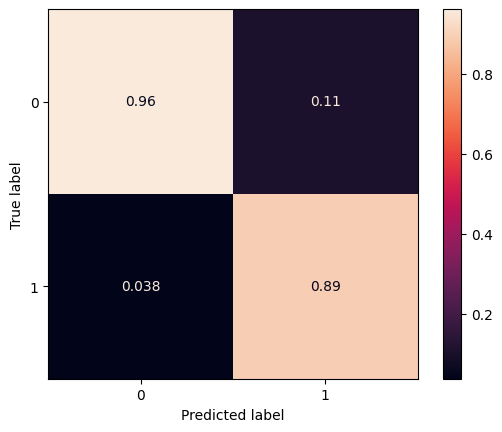

_____________________________________________


In [418]:
from sklearn.metrics import ConfusionMatrixDisplay
for i in classifiers:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(i)
    cm = confusion_matrix(y_test, y_pred, normalize='pred')
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot(cmap='rocket', colorbar=True)
    plt.show()
    print("_____________________________________________")

# XAI

In [419]:
import shap
def shap_plot(base_model, instance):
    
    model = base_model.fit(X_train, y_train)      # fit model as usual

    explainer = shap.Explainer(model, X_train)   # this is the shap part, it will change according to the models.
    shap_values = explainer(X_test)  # calculating feature importance score

    shap.initjs()           # this is for the plot to work
    print(f"Sample number: {instance}")

    preds = model.predict(X_test)
    probability = model.predict_proba(X_test)

    print(f"Actual class: {y_test.iloc[instance]}")
    print(f"Predicted class: {preds[instance]}")
    print(f"Class 0 Possibility: {probability[instance][0]:.2f}")
    print(f"Class 1 Possibility: {probability[instance][1]:.2f}")

    # print(X_test.iloc[instance])      # to view the values of instance
    # print(shap_values[instance])      # to view the shap scores
    
    plt.grid(False)
    # SHAP Plots
    shap.plots.beeswarm(shap_values, max_display=13)
    shap.plots.bar(shap_values[instance], max_display=13)
    shap.plots.waterfall(shap_values[instance], max_display=13)
    # shap.dependence_plot(2, shap_values, X_test)

    # force plot
    return shap.plots.force(shap_values[instance])

Sample number: 3623
Actual class: 0.0
Predicted class: 0.0
Class 0 Possibility: 0.64
Class 1 Possibility: 0.36


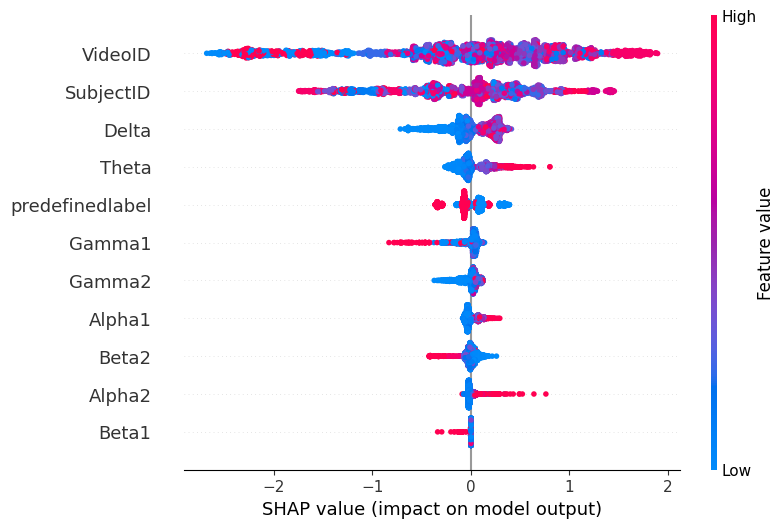

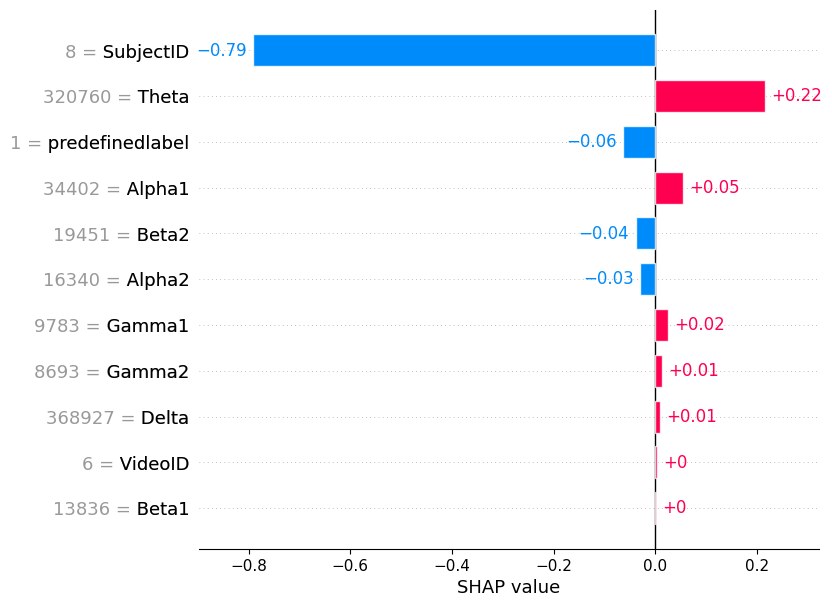

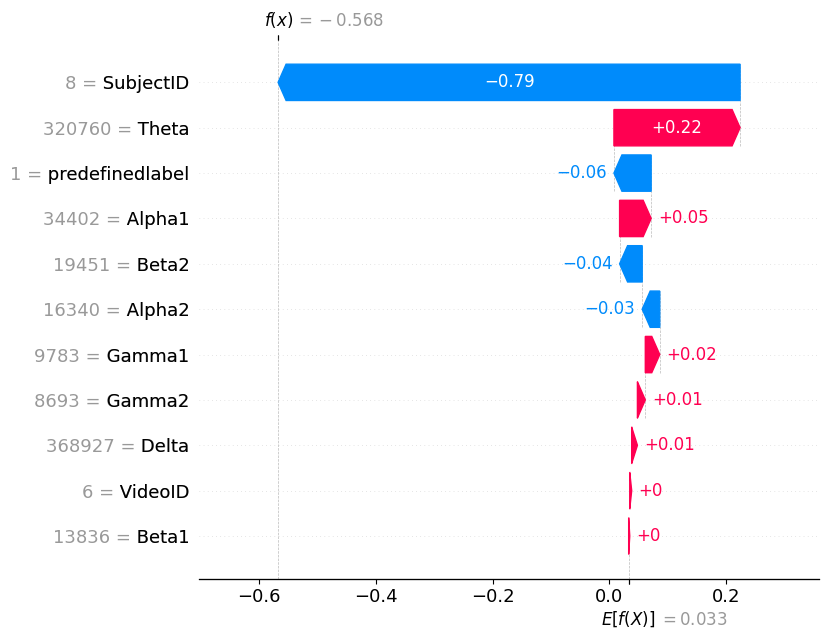

In [430]:
shap_plot(GradientBoostingClassifier(), np.random.randint(0, X_test.shape[0]))

## LIME

In [424]:
m = GradientBoostingClassifier(max_depth=10)
m.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10)

In [431]:
import lime
from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['Distracted','Attentive'], 
                                                  verbose=True, 
                                                  mode='classification')

# Choose the jth instance and use it to predict the results for that selection
j = np.random.randint(0, X_test.shape[0])
print(f"Sample No: {j}") 
exp = explainer.explain_instance(X_test.values[j], m.predict_proba, num_features=20)

exp.show_in_notebook(show_table=True)

Sample No: 1045
Intercept 0.4356367240847113
Prediction_local [0.70897005]
Right: 0.9998225412946304


c:\Users\niloy\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
